In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [30]:
data_file = "/Users/jasonchoi/Desktop/School/COSC420/evolutionary-poker/output/combination_75_0.2_0.2_8_50_3000/lineage_history/lineage_history.csv"

data = pd.read_csv(data_file)

In [31]:
# Filter the last 5 generations
last_5_generations = data[data['generation'].str.extract('(\d+)$').astype(int)[0] >= (data['generation'].str.extract('(\d+)$').astype(int)[0].max() - 4)]

# Group by player ID and calculate the average fitness
average_fitness = last_5_generations.groupby('id')['fitness'].mean()

# Get the player with the best average fitness
best_player_id = average_fitness.idxmax()
player = data[data['id'] == best_player_id].iloc[0]
print(player)

trait = [col for col in data.columns if col.startswith('trait_')]
trait_values = {col[6:]: player[col] for col in trait}
# trait_values

lineage                       6713ebde-29a
generation                   generation_48
id                                08526308
fitness                           1.319237
lineage_fitness                   1.538473
lineage_avg_fitness               1.223423
rounds_lasted                            6
table_position                         4.0
trait_aggressiveness                  0.77
trait_risk_tolerance                  0.71
trait_bluff_tendency                  0.75
trait_adaptability                    0.14
trait_position_awareness              0.72
trait_chip_size_awareness             0.62
action_fold                              0
action_check                             0
action_call                             20
action_raise                            19
action_all_in                            0
action_bluff                             0
iteration                                0
Name: 2823, dtype: object


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/nq/mqys_h3n0z1clrnlkq60rks00000gn/T/ipykernel_8017/1772390142.py:2: SyntaxWarning: invalid escape sequence '\d'
  last_5_generations = data[data['generation'].str.extract('(\d+)$').astype(int)[0] >= (data['generation'].str.extract('(\d+)$').astype(int)[0].max() - 4)]
/var/folders/nq/mqys_h3n0z1clrnlkq60rks00000gn/T/ipykernel_8017/1772390142.py:2: SyntaxWarning: invalid escape sequence '\d'
  last_5_generations = data[data['generation'].str.extract('(\d+)$').astype(int)[0] >= (data['generation'].str.extract('(\d+)$').astype(int)[0].max() - 4)]


In [32]:
data.head()

,lineage,generation,id,fitness,lineage_fitness,lineage_avg_fitness,rounds_lasted,table_position,trait_aggressiveness,trait_risk_tolerance,...,trait_adaptability,trait_position_awareness,trait_chip_size_awareness,action_fold,action_check,action_call,action_raise,action_all_in,action_bluff,iteration
0,e98930c1-b53,generation_-1,b8678139,0.000000,0.000000,0.0,0,NaN,0.12,0.64,...,0.60,0.44,0.49,0,0,0,0,0,0,0
1,e98930c1-b53,generation_0,b8678139,0.137545,0.084018,0.0,16,0.0,0.12,0.64,...,0.60,0.44,0.49,15,10,54,0,0,0,0
2,715b2829-1b9,generation_-1,cefeefb0,0.000000,0.000000,0.0,0,NaN,0.94,0.27,...,0.95,0.79,0.50,0,0,0,0,0,0,0
3,715b2829-1b9,generation_0,cefeefb0,0.023631,0.040119,0.0,12,0.0,0.94,0.27,...,0.95,0.79,0.50,12,4,39,0,0,0,0
4,8b2003bd-de5,generation_-1,f76be9f8,0.000000,0.000000,0.0,0,NaN,0.32,0.78,...,0.10,0.17,0.58,0,0,0,0,0,0,0


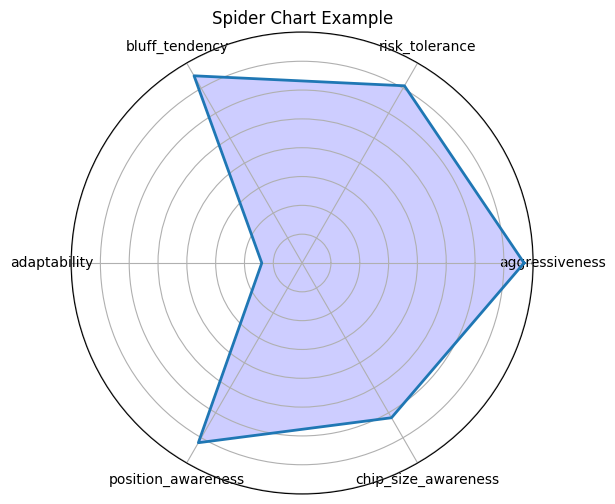

In [33]:
# Number of variables
num_vars = len(trait_values.keys())
values = list(trait_values.values())
labels = list(trait_values.keys())
# Compute angle for each trait
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot close to a circle
values += values[:1]
angles += angles[:1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data
line, = ax.plot(angles, values, linewidth=2, linestyle='solid', label='Trait Comparison')
fill = ax.fill(angles, values, 'b', alpha=0.1)

# Fill the area inside the chart
ax.fill(angles, values, 'b', alpha=0.1)

# Set the labels
ax.set_yticklabels([])  # Hide radial axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Title
plt.title('Spider Chart Example')

# Show the plot
plt.show()

In [34]:
full_player_history = data[data['id'] == player['id']]

In [35]:
full_player_history

,lineage,generation,id,fitness,lineage_fitness,lineage_avg_fitness,rounds_lasted,table_position,trait_aggressiveness,trait_risk_tolerance,...,trait_adaptability,trait_position_awareness,trait_chip_size_awareness,action_fold,action_check,action_call,action_raise,action_all_in,action_bluff,iteration
2823,6713ebde-29a,generation_48,08526308,1.319237,1.538473,1.223423,6,4.0,0.77,0.71,...,0.14,0.72,0.62,0,0,20,19,0,0,0


/var/folders/nq/mqys_h3n0z1clrnlkq60rks00000gn/T/ipykernel_8017/2051775400.py:55: UserWarning: frames=<generator object frame_sequence at 0x146c08120> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=frame_sequence(), interval=max_interval, blit=True)


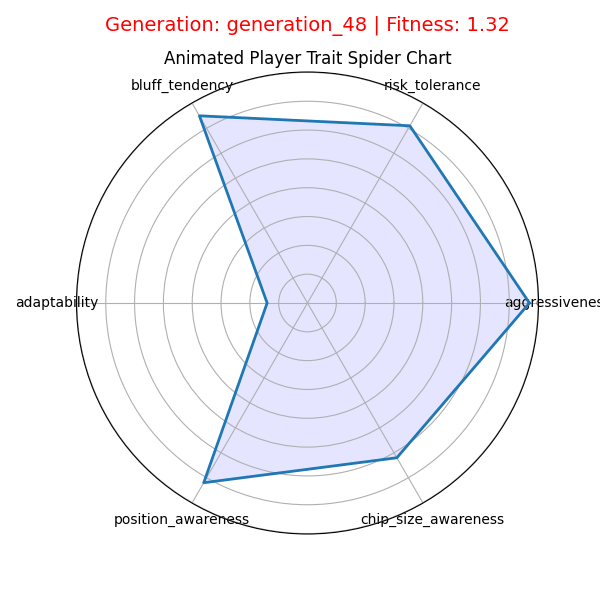

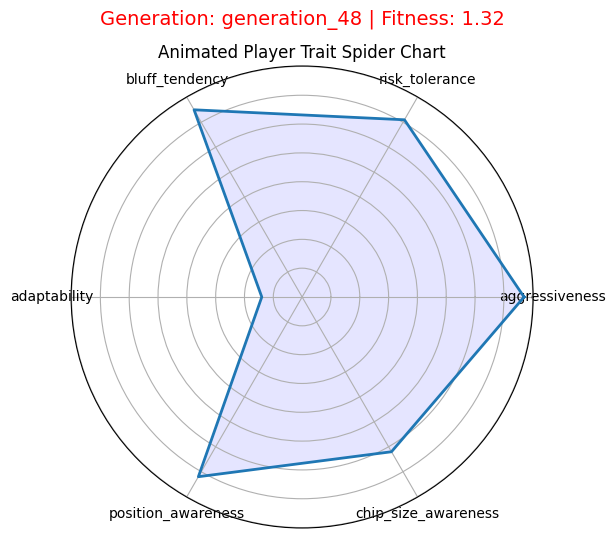

In [36]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Number of variables
num_vars = len(trait_values.keys())
values = list(trait_values.values())
labels = list(trait_values.keys())
# Compute angle for each trait
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot close to a circle
values += values[:1]
angles += angles[:1]

text = ax.text(
    0.5, 1.1,
    f"Generation: {full_player_history.iloc[0]['generation']} | Fitness: {full_player_history.iloc[0]['fitness']:.2f}",
    transform=ax.transAxes, ha='center', va='center', fontsize=14, color='red'
)

line, = ax.plot(angles, values, linewidth=2, linestyle='solid', label='Trait Comparison')
fill = ax.fill(angles, values, 'b', alpha=0.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Animated Player Trait Spider Chart')

# Calculate the maximum interval
total_duration = 60  # Reduced total duration of the animation in seconds
max_interval = min(200, total_duration * 1000 // len(full_player_history))  # Ensure interval is at least 200ms

def update(frame):
    if frame >= len(full_player_history):
        return [line] + fill + [text]
    player_row = full_player_history.iloc[frame]
    trait_values_frame = [player_row[col] for col in trait]
    trait_values_frame += trait_values_frame[:1]
    line.set_ydata(trait_values_frame)
    fill[0].set_xy(np.column_stack([angles, trait_values_frame]))
    # Update fitness and generation text
    text.set_text(
        f"Generation: {player_row['generation']} | Fitness: {player_row['fitness']:.2f}"
    )
    return [line] + fill + [text]

end_delay_frames = 30

def frame_sequence():
    for i in range(len(full_player_history)):
        yield i
    last = len(full_player_history) - 1
    for _ in range(end_delay_frames):
        yield last

# Create the animation
ani = FuncAnimation(fig, update, frames=frame_sequence(), interval=max_interval, blit=True)
# Display the animation in the Jupyter Notebook
from IPython.display import Image
ani.save("player_trait_animation.gif", writer="pillow")
Image(filename="player_trait_animation.gif")

